# Import Package & Data

In [1]:
#Import Python Package Library
#Pandas merupakan library untuk running operasi 

import pandas as pd
import numpy as np

In [2]:
#Import file csv from desktop

df = pd.read_csv('.\[BRI] Python Assessment Data.csv')
df.head()

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success


In [3]:
#Import file csv from desktop

df2 = pd.read_csv('.\[BRI] Python Assessment Data 2.csv')
df2.head()

,Merchant ID,Merchant Criteria,Merchant Type
0,X610005443,(UMI) Usaha Mikro,Restaurants
1,X610005869,(UMI) Usaha Mikro,Miscellaneous
2,X314022534,(UKE) Usaha Kecil,Food & Beverages
3,X612400459,(UKE) Usaha Kecil,Miscellaneous
4,X614400335,(UKE) Usaha Kecil,Miscellaneous


# Cleansing Data I

In [4]:
#Mengecek format data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  11000 non-null  int64  
 1   Transaction Number  11000 non-null  object 
 2   Merchant ID         10966 non-null  object 
 3   Tipe Transaksi      11000 non-null  object 
 4   Nama Issuer         11000 non-null  object 
 5   Nominal             10989 non-null  float64
 6   Transaction Date    11000 non-null  object 
 7   Status              11000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 687.6+ KB


In [5]:
#Mengubah format value object menjadi date time

df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format = "%Y-%m-%d %H:%M:%S")
df.head()

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success


In [6]:
#Memisahkan format date time menjadi Tanggal dan Waktu

df["Tanggal"] = df["Transaction Date"].dt.date
df["Waktu"] = df["Transaction Date"].dt.time
df.head()

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,2022-07-10,23:44:59
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,2022-07-10,23:36:31
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,2022-07-10,23:32:14
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,2022-07-20,23:32:39
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,2022-07-10,23:18:16


In [7]:
#Memisahkan hour only pada kolom Waktu

df['Jam'] = df['Transaction Date'].dt.hour


#Mengambil Tanggal dan Bulan

df['Tanggal'] = df['Transaction Date'].dt.day
df['Day'] = df['Transaction Date'].dt.day_name()
df['Bulan'] = df['Transaction Date'].dt.month
df['Month'] = df['Transaction Date'].dt.month_name()

In [8]:
#Memperlihatkan sum value yang hilang

df.isna().sum()

No                     0
Transaction Number     0
Merchant ID           34
Tipe Transaksi         0
Nama Issuer            0
Nominal               11
Transaction Date       0
Status                 0
Tanggal                0
Waktu                  0
Jam                    0
Day                    0
Bulan                  0
Month                  0
dtype: int64

In [9]:
#Menghilangkan value yang hilang

df_non_missing = df.dropna()

In [10]:
#Memperlihatkan sum value yang hilang

df_non_missing.isna().sum()

No                    0
Transaction Number    0
Merchant ID           0
Tipe Transaksi        0
Nama Issuer           0
Nominal               0
Transaction Date      0
Status                0
Tanggal               0
Waktu                 0
Jam                   0
Day                   0
Bulan                 0
Month                 0
dtype: int64

In [11]:
#Memperlihatkan data refund dan pembayaran yang sama

df_non_missing.duplicated().sum() 

835

In [12]:
#Menghilangkan data refund dan pembayaran yang sama

dfbaru = df_non_missing.drop_duplicates(keep = 'last')
dfbaru.duplicated().sum()

0

In [13]:
#Menampilkan data yang refund dan tidak refund (pembayaran)

df_refund = dfbaru[dfbaru['Tipe Transaksi'].str.contains('Refund')==True]
df_non_refund = dfbaru[dfbaru['Tipe Transaksi'].str.contains('Refund')==False]

In [14]:
#Menampilkan data yang refund

df_refund

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month
270,6255,B005473703,X603500128,Refund,OVO,82000.0,2022-07-20 16:35:44,success,20,16:35:44,16,Wednesday,7,July
275,6316,B005045220,X603500091,Refund,BCA,50000.0,2022-07-20 16:33:02,success,20,16:33:02,16,Wednesday,7,July
330,7577,B004862725,X201178662,Refund,BNI,162500.0,2022-07-20 15:29:58,success,20,15:29:58,15,Wednesday,7,July
332,7591,B005611955,X610500423,Refund,BNI,520000.0,2022-07-20 15:29:31,success,20,15:29:31,15,Wednesday,7,July
1346,30807,B004935174,X210900291,Refund,BNI,80000.0,2022-07-19 14:25:10,success,19,14:25:10,14,Tuesday,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10793,279703,B004304600,X608500737,Refund,BRI,725000.0,2022-07-01 14:57:52,success,1,14:57:52,14,Friday,7,July
10795,279713,B004179821,X608500737,Refund,BRI,490000.0,2022-07-01 14:57:26,success,1,14:57:26,14,Friday,7,July
10826,281447,B004306884,X614500398,Refund,BCA,160500.0,2022-07-01 14:03:43,success,1,14:03:43,14,Friday,7,July
10923,288593,B002023013,X608500764,Refund,BNI,1000000.0,2022-07-01 10:37:51,success,1,10:37:51,10,Friday,7,July


In [15]:
#Menampilkan data yang tidak refund

df_non_refund

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,10,23:44:59,23,Sunday,7,July
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,10,23:36:31,23,Sunday,7,July
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,10,23:32:14,23,Sunday,7,July
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,20,23:32:39,23,Wednesday,7,July
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,10,23:18:16,23,Sunday,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,293089,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,success,1,03:26:26,3,Friday,7,July
10996,293275,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,success,1,01:44:30,1,Friday,7,July
10997,293367,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,success,1,01:12:04,1,Friday,7,July
10998,293455,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,success,1,00:43:01,0,Friday,7,July


In [16]:
#Pembuktian trx number duplicate pada refund & pembayaran)

dfsama = df_non_refund[df_non_refund['Transaction Number'].isin(df_refund['Transaction Number'])].sort_values(by = 'Tipe Transaksi')
dfsama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 423 to 10909
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  51 non-null     int64         
 1   Transaction Number  51 non-null     object        
 2   Merchant ID         51 non-null     object        
 3   Tipe Transaksi      51 non-null     object        
 4   Nama Issuer         51 non-null     object        
 5   Nominal             51 non-null     float64       
 6   Transaction Date    51 non-null     datetime64[ns]
 7   Status              51 non-null     object        
 8   Tanggal             51 non-null     int64         
 9   Waktu               51 non-null     object        
 10  Jam                 51 non-null     int64         
 11  Day                 51 non-null     object        
 12  Bulan               51 non-null     int64         
 13  Month               51 non-null     object     

In [17]:
#Drop data refund

dfclean = df_non_refund[df_non_refund['Transaction Number'].isin(dfsama['Transaction Number'])==False]
dfclean

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,10,23:44:59,23,Sunday,7,July
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,10,23:36:31,23,Sunday,7,July
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,10,23:32:14,23,Sunday,7,July
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,20,23:32:39,23,Wednesday,7,July
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,10,23:18:16,23,Sunday,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,293089,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,success,1,03:26:26,3,Friday,7,July
10996,293275,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,success,1,01:44:30,1,Friday,7,July
10997,293367,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,success,1,01:12:04,1,Friday,7,July
10998,293455,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,success,1,00:43:01,0,Friday,7,July


In [18]:
#Memperlihatkan data Tipe Transaksi yang sama

dfclean.duplicated().sum()

0

In [19]:
#Menghilangkan data/Filter nominal trx < 10 juta (Peraturan BI per 1 Maret 2022, transaksi QRIS minimal sebesar Rp.10.000.000)

df_trx_filter = dfclean[dfclean['Nominal']<=10000000]
df_trx_filter

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,10,23:44:59,23,Sunday,7,July
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,10,23:36:31,23,Sunday,7,July
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,10,23:32:14,23,Sunday,7,July
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,20,23:32:39,23,Wednesday,7,July
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,10,23:18:16,23,Sunday,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,293089,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,success,1,03:26:26,3,Friday,7,July
10996,293275,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,success,1,01:44:30,1,Friday,7,July
10997,293367,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,success,1,01:12:04,1,Friday,7,July
10998,293455,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,success,1,00:43:01,0,Friday,7,July


In [20]:
#Menghilangkan kolom yang tidak terpakai

dfnew = df_trx_filter.drop(columns = ['No', 'Status' , 'Transaction Date'])
dfnew.head()

,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Tanggal,Waktu,Jam,Day,Bulan,Month
0,B005215005,X610005448,Pembayaran,DANA,100000.0,10,23:44:59,23,Sunday,7,July
1,B005214931,X610110384,Pembayaran,DANA,150000.0,10,23:36:31,23,Sunday,7,July
2,B005214895,X612094437,Pembayaran,DANA,20000.0,10,23:32:14,23,Sunday,7,July
3,B005744332,X610110454,Pembayaran,DANA,100000.0,20,23:32:39,23,Wednesday,7,July
4,B005214792,X610115833,Pembayaran,DANA,50000.0,10,23:18:16,23,Sunday,7,July


# Pivot Dataframe I

In [21]:
#Pivot Dataframe untuk menampilkan Merchant ID dan Nominal

dfpivot_merchant = pd.pivot_table (dfnew, index = ['Merchant ID'], values = ['Nominal'], aggfunc = {np.sum})
dfpivot_merchant.reset_index(inplace = True)
dfpivot_merchant.columns = ["Merchant ID", "Nominal"]
dfpivot_merchant.head()

,Merchant ID,Nominal
0,X1010172,226600.0
1,X11017480,80000.0
2,X12000017,1.0
3,X12126900,2878520.0
4,X12208583,233000.0


In [22]:
#Menampilkan pivot dataframe I

dfpivot_merchant

,Merchant ID,Nominal
0,X1010172,226600.0
1,X11017480,80000.0
2,X12000017,1.0
3,X12126900,2878520.0
4,X12208583,233000.0
...,...,...
3115,X618500133,1506.0
3116,X618500135,405.0
3117,X618500136,13.0
3118,X6990048,242000.0


# Cleansing Data II

In [23]:
#Menampilkan Data Frame II

df2

,Merchant ID,Merchant Criteria,Merchant Type
0,X610005443,(UMI) Usaha Mikro,Restaurants
1,X610005869,(UMI) Usaha Mikro,Miscellaneous
2,X314022534,(UKE) Usaha Kecil,Food & Beverages
3,X612400459,(UKE) Usaha Kecil,Miscellaneous
4,X614400335,(UKE) Usaha Kecil,Miscellaneous
...,...,...,...
3131,X609181126,(UMI) Usaha Mikro,Restaurants
3132,X609181048,(UMI) Usaha Mikro,Restaurants
3133,X609180737,(UMI) Usaha Mikro,Miscellaneous
3134,X604194335,(UMI) Usaha Mikro,Food & Beverages


In [24]:
#Mengecek data yang double pada dataframe II

df2.duplicated().sum()

0

In [25]:
#Mengecek data yang kosong pada dataframe II
df2.isna().sum()

Merchant ID          0
Merchant Criteria    0
Merchant Type        0
dtype: int64

# Merge Dataframe I dan Dataframe II

In [26]:
#Merge Datafram I dan Dataframe II

df_merchant = pd.merge (df_trx_filter, df2 , on = ["Merchant ID"], how = "left")
df_merchant

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,293089,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,success,1,03:26:26,3,Friday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
9996,293275,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,success,1,01:44:30,1,Friday,7,July,(UMI) Usaha Mikro,Automobiles And Vehicles
9997,293367,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,success,1,01:12:04,1,Friday,7,July,(UMI) Usaha Mikro,Restaurants
9998,293455,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,success,1,00:43:01,0,Friday,7,July,(UMI) Usaha Mikro,Restaurants


In [27]:
#Menampilkan jumlah data value yang kosong

df_merchant.isna().sum()

No                    0
Transaction Number    0
Merchant ID           0
Tipe Transaksi        0
Nama Issuer           0
Nominal               0
Transaction Date      0
Status                0
Tanggal               0
Waktu                 0
Jam                   0
Day                   0
Bulan                 0
Month                 0
Merchant Criteria     8
Merchant Type         8
dtype: int64

In [28]:
#Menampilkan data value yang kosong

df_merchant_na = df_merchant[df_merchant["Merchant Criteria"].isna()]
df_merchant_na

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type
957,24444,B006086161,X618004874,Pembayaran,MANDIRI,60000.0,2022-07-30 19:29:12,success,30,19:29:12,19,Saturday,7,July,NaN,NaN
1753,43207,B006056889,X618019221,Pembayaran,BRI,381180.0,2022-07-29 20:05:08,success,29,20:05:08,20,Friday,7,July,NaN,NaN
1858,45646,B005129310,X618019515,Pembayaran,DANA,132000.0,2022-07-09 19:36:16,success,9,19:36:16,19,Saturday,7,July,NaN,NaN
4748,116682,B005947120,X618019515,Pembayaran,BCA,182000.0,2022-07-26 18:09:05,success,26,18:09:05,18,Tuesday,7,July,NaN,NaN
4840,119058,B004960959,X615008633,Pembayaran,BCA,20000.0,2022-07-07 15:17:54,success,7,15:17:54,15,Thursday,7,July,NaN,NaN
5530,135922,B005417633,X615008633,Pembayaran,MANDIRI,24000.0,2022-07-14 15:56:47,success,14,15:56:47,15,Thursday,7,July,NaN,NaN
6505,160076,B005881700,X608025988,Pembayaran,BCA,100000.0,2022-07-24 21:31:04,success,24,21:31:04,21,Sunday,7,July,NaN,NaN
6980,172121,B005326477,X615008633,Pembayaran,BCA,29000.0,2022-07-12 21:36:04,success,12,21:36:04,21,Tuesday,7,July,NaN,NaN


In [29]:
#Menampilkan tabel dengan data value yang tidak kosong

df_merchantnew = df_merchant.dropna()
df_merchantnew

,No,Transaction Number,Merchant ID,Tipe Transaksi,Nama Issuer,Nominal,Transaction Date,Status,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type
0,35,B005215005,X610005448,Pembayaran,DANA,100000.0,2022-07-10 23:44:59,success,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
1,64,B005214931,X610110384,Pembayaran,DANA,150000.0,2022-07-10 23:36:31,success,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
2,79,B005214895,X612094437,Pembayaran,DANA,20000.0,2022-07-10 23:32:14,success,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
3,117,B005744332,X610110454,Pembayaran,DANA,100000.0,2022-07-20 23:32:39,success,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants
4,130,B005214792,X610115833,Pembayaran,DANA,50000.0,2022-07-10 23:18:16,success,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,293089,B004562347,X612094437,Pembayaran,DANA,68000.0,2022-07-01 03:26:26,success,1,03:26:26,3,Friday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
9996,293275,B004561975,X610153453,Pembayaran,OVO,49412.0,2022-07-01 01:44:30,success,1,01:44:30,1,Friday,7,July,(UMI) Usaha Mikro,Automobiles And Vehicles
9997,293367,B004561820,X610153755,Pembayaran,DANA,50000.0,2022-07-01 01:12:04,success,1,01:12:04,1,Friday,7,July,(UMI) Usaha Mikro,Restaurants
9998,293455,B004561651,X610006258,Pembayaran,DANA,30000.0,2022-07-01 00:43:01,success,1,00:43:01,0,Friday,7,July,(UMI) Usaha Mikro,Restaurants


In [30]:
#Drop unused columns inside the table

df_merchantnew.drop(columns = ['No', 'Tipe Transaksi', 'Transaction Date', 'Status'], inplace = True)
df_merchantnew.head()

C:\Users\IINDO 67\AppData\Local\Temp\ipykernel_8128\1817402121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchantnew.drop(columns = ['No', 'Tipe Transaksi', 'Transaction Date', 'Status'], inplace = True)


,Transaction Number,Merchant ID,Nama Issuer,Nominal,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type
0,B005215005,X610005448,DANA,100000.0,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
1,B005214931,X610110384,DANA,150000.0,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
2,B005214895,X612094437,DANA,20000.0,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
3,B005744332,X610110454,DANA,100000.0,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants
4,B005214792,X610115833,DANA,50000.0,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous


In [31]:
#Melihat jumlah baris dan kolom

df_merchantnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction Number  9992 non-null   object 
 1   Merchant ID         9992 non-null   object 
 2   Nama Issuer         9992 non-null   object 
 3   Nominal             9992 non-null   float64
 4   Tanggal             9992 non-null   int64  
 5   Waktu               9992 non-null   object 
 6   Jam                 9992 non-null   int64  
 7   Day                 9992 non-null   object 
 8   Bulan               9992 non-null   int64  
 9   Month               9992 non-null   object 
 10  Merchant Criteria   9992 non-null   object 
 11  Merchant Type       9992 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1014.8+ KB


In [32]:
#Saving Files to CSV

df_merchantnew.to_csv("Data Clean Coba.csv", index = False)

# PIVOT Assignment

## PIVOT I : Untuk Melihat Total Nominal dan Jumlah Transaksi berdasarkan Nama Issuer tiap Merchant ID pada Jam Tertentu

In [33]:
#Pivot untuk Melihat Jumlah Transaksi dan Nominal berdasarkan Issuer

dfpivotbaru = pd.pivot_table(df_merchantnew, index=["Merchant ID","Nama Issuer", "Tanggal", "Jam"],aggfunc={"Nominal":"sum","Transaction Number":"count"}).sort_values(by='Nominal', ascending=False).astype(int)
dfpivotbaru.reset_index(inplace=True)
dfpivotbaru

,Merchant ID,Nama Issuer,Tanggal,Jam,Nominal,Transaction Number
0,X605045913,BCA,26,17,8502500,1
1,X610153754,BCA,25,20,7000000,1
2,X610117010,BCA,17,10,6500000,1
3,X609177727,BCA,23,17,5850000,1
4,X605045913,BRI,27,20,5480000,1
...,...,...,...,...,...,...
9205,X601500158,BNI,4,14,1,1
9206,X601500158,BNI,5,10,1,1
9207,X601500158,BNI,7,13,1,1
9208,X601500158,BNI,8,6,1,1


NOTES:

1. Tujuan dilakukan pivot pada tabel ini adalah untuk melihat total nominal dan jumlah transaksi berdasarkan nama issuer tiap Merchant ID pada Jam dan Tanggal tertentu, pivot ini dapat digunakan untuk memberikan insight BRI sehingga dapat digunakan untuk menyusun strategi penetrasi merchant dan promo merchant pada jam atau tanggal tertentu.

2. Variabel Nama Issuer, Nominal dan Transaction Number dapat digunakan BRI untuk melihat sebaran merchant ID yang memiliki nilai nominal yang tinggi dan jumlah transaksi yang banyak.

3. Variabel Nama Issuer, Nominal dan Transaction Number dapat disandingkan dengan Merchant Type dan Merchant Criteria untuk melihat Market Share Issuer Bank pada Merchant Type dan Merchant Criteria tertentu. Masing-masing variabel dan data dapat dijadikan interpretasi untuk bisnis perusahaan (BRI).

4. Dengan variabel nominal, BRI dapat melihat Merchant ID dengan nominal terbesar dan terkecil

5. Variabel Tanggal dan Jam dapat digunakan BRI untuk melihat peak hour dan peak tanggal (awal bulan, tengah bulan dan akhir bulan) pada setiap Merchant ID dengan melihat besaran nominal transaksi dan jumlah transaksi. Variabel Tanggal dan Jam ini dapat digunakan BRI untuk menjadi acuan strategi untuk menentukan promosi, program, dan ekspansi bisnis sehingga dapat tepat sasaran.

6. Variabel yang dapat ditambahkan pada pivot table ini adalah Merchant Type dan Merchant Criteria. Variabel tersebut dapat ditambahkan untuk mengetahui jenis merchant dan segmen merchant apa yang jumlahnya banyak. BRI dapat melihat peluang bisnisnya berdasarkan Merchant Type dan Merchant Criteria.

## PIVOT II : Untuk Melihat Jumlah Nominal Transaksi tiap Nama Issuer pada Merchant ID

In [34]:
#Pivot untuk melihat data per Merchant ID berdasarkan Nama Issuer

dfpivotbaru1 = pd.pivot_table(df_merchantnew, index=["Merchant ID"], columns = ["Nama Issuer"], values= ['Nominal'], aggfunc='sum')
dfpivotbaru1 = dfpivotbaru1.fillna(0).astype(int)
dfpivotbaru1

Nominal                                             \
Nama Issuer ARTHA GRAHA ASTRAPAY Allo Bank BANK KEB HANA BANK MEGA   
Merchant ID                                                          
X1010172              0        0         0             0         0   
X11017480             0        0         0             0         0   
X12000017             0        0         0             0         0   
X12126900             0        0         0             0         0   
X12208583             0        0         0             0         0   
...                 ...      ...       ...           ...       ...   
X618500133            0        0         0             0         0   
X618500135            0        0         0             0         0   
X618500136            0        0         0             0         0   
X6990048              0        0         0             0         0   
X8064420              0        0         0             0         0   

                                                                            \
Nama Issuer BANK NATIONAL NOBU BANK QNB INDONESIA BANK UOB    BCA      BNI   
Merchant ID                                                                  
X1010172                     0                  0        0      0   226600   
X11017480                    0                  0        0      0        0   
X12000017                    0                  0        0      0        1   
X12126900                    0                  0        0      0  2878520   
X12208583                    0                  0        0  99000   134000   
...                        ...                ...      ...    ...      ...   
X618500133                   0                  0        0      0     1506   
X618500135                   0                  0        0      0      405   
X618500136                   0                  0        0      0       13   
X6990048                     0                  0        0      0   242000   
X8064420                     0                  0        0      0   156150   

             ...                                      \
Nama Issuer  ... OCBC NISP OVO PERMATA POS Indonesia   
Merchant ID  ...                                       
X1010172     ...         0   0       0             0   
X11017480    ...         0   0       0             0   
X12000017    ...         0   0       0             0   
X12126900    ...         0   0       0             0   
X12208583    ...         0   0       0             0   
...          ...       ...  ..     ...           ...   
X618500133   ...         0   0       0             0   
X618500135   ...         0   0       0             0   
X618500136   ...         0   0       0             0   
X6990048     ...         0   0       0             0   
X8064420     ...         0   0       0             0   

                                                               \
Nama Issuer PT Bank BPD Kalimantan Timur dan Kalimantan Utara   
Merchant ID                                                     
X1010172                                                    0   
X11017480                                                   0   
X12000017                                                   0   
X12126900                                                   0   
X12208583                                                   0   
...                                                       ...   
X618500133                                                  0   
X618500135                                                  0   
X618500136                                                  0   
X6990048                                                    0   
X8064420                                                    0   

                                                                              
Nama Issuer PT Bank Digital BCA PT. Bank BCA Syariah SHOPEEPAY SINARMAS SPIN  
Merchant ID                                                                   
X1010172 

NOTES:

1. Tujuan dilakukan pivot pada tabel ini adalah untuk melihat jumlah nominal transaksi setiap Issuer pada Merchant ID. Pivot ini dapat digunakan BRI untuk melihat perbandingan jumlah nominal Issuer BRI dengan kompetitor pada setiap Merchant ID sehingga dapat dijadikan insight untuk BRI dalam membuat strategi marketing dan promo untuk Merchant ID tertentu yang memiliki jumlah nominal yang masih kecil.

2. Variabel jumlah nominal tiap Nama Issuer dapat digunakan perusahaan BRI untuk melihat perbandingan BRI dengan Issuer lain pada tiap merchant ID dan dapat melihat jumlah total nominal setiap Issuer dibandingkan dengan BRI.

3. BRI dapat menggunakan data ini untuk membandingkan market share Issuer BRI dibandingkan dengan kompetitor sehingga dapat dijadikan acuan strategi untuk membuat program dan penetrasi Merchant Issuer. BRI juga dapat melihat potensi Merchant ID yang masih belum banyak digarap oleh kompetitor lain sehingga BRI dapat memaksimalkan promo dan ekpansi bisnis pada Merchant ID tersebut.

## 1. Total Nominal Transaksi Merchant Type

In [35]:
#Pivot untuk Melihat Total Nominal dan Banyaknya Transaksi berdasarkan Merchant Type (Top 5)

dfmerchant_type1 = pd.pivot_table(df_merchantnew, index = ['Merchant Type'], aggfunc = {'Nominal':'sum'}).sort_values(by='Nominal', ascending=False).astype(int)
dfmerchant_type1.reset_index(inplace = True)
dfmerchant_type1.sort_values(by='Nominal', ascending = False).head()

,Merchant Type,Nominal
0,Restaurants,380255753
1,Miscellaneous,128748722
2,Health Service,84006255
3,Food & Beverages,51122183
4,Clothing,34124876


### 5 Nominal Terendah

In [36]:
#Menampilkan 5 Nominal Terendah

dfmerchant_type1.sort_values(by='Nominal', ascending = True).head()

,Merchant Type,Nominal
23,Hobbies/Gift,48000
22,Watches & Jewelry,355106
21,Travel,487000
20,Education,760000
19,OTHERS,1810199


Analisa:

- Dengan melihat Total Nominal Transaksi berdasarkan Merchant Type, BRI dapat melihat Tipe Merchant yang menghasilkan Sales Volume terbesar sehingga BRI dapat mengoptimalkan program promo atau marketing lainnya pada segmen tersebut.

- 5 Nominal Transaksi (Sales Volume) Tertinggi berdasarkan Merchant Type adalah Restaurants, Miscellaneous, Health Service, Food & Beverages, Clothing. Nominal Transaksi Terbesar pada Tipe Restaurant dengan nominal sebesar Rp.380.255.753.

- 5 Nominal Transaksi (Sales Volume) Terendah berdasarkan Merchant Type adalah Hobbies/Gift, Watches & Jewelry, Travel, Education, Others. Nominal Transaksi Terkecil pada Tipe Hobbies/Gift dengan nominal sebesar Rp.48.000.

- Dengan melihat Sales Volume terendah, BRI dapat memprioritaskan Merchant Type yang rendah untuk ditingkatkan program promo, brand awareness terkait iklan promo pada Merchant Type tersebut. Setiap bulannya dengan data ini, BRI dapat mengukur seberapa efektif program promo dan iklan promo tersebut terhadap peningkatan sales volume.

In [37]:
#Package Grafik/Plot

import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Nominal')

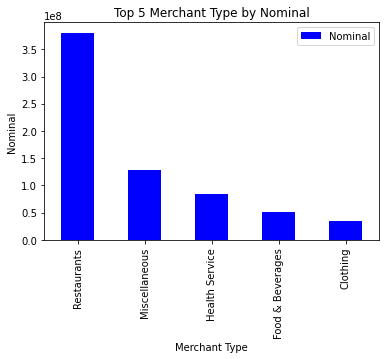

In [38]:
#Bentuk Grafik Top 5 Merchant Type by Nominal

gra_merchant1 = dfmerchant_type1.head().plot.bar(x = "Merchant Type", y = "Nominal", color = ['Blue'])
gra_merchant1
gra_merchant1.set_title("Top 5 Merchant Type by Nominal")
gra_merchant1.set_xlabel("Merchant Type")
gra_merchant1.set_ylabel("Nominal")

## 2. Banyaknya Transaksi Merchant Type

In [39]:
#Pivot untuk Melihat Total Nominal dan Banyaknya Transaksi berdasarkan Merchant Type

dfmerchant_type2 = pd.pivot_table(df_merchantnew, index = ['Merchant Type'], aggfunc = {'Transaction Number':'count'}).sort_values(by='Transaction Number', ascending=False).astype(int)
dfmerchant_type2.reset_index(inplace = True)
dfmerchant_type2.sort_values(by='Transaction Number', ascending = False).head()

,Merchant Type,Transaction Number
0,Restaurants,4461
1,OTHERS,1591
2,Miscellaneous,1485
3,Food & Beverages,460
4,Health Service,411


### 5 Jumlah Transaksi Terendah

In [40]:
#Menampilkan 5 Banyaknya Transaksi Terendah

dfmerchant_type2.sort_values(by='Transaction Number', ascending = True).head()

,Merchant Type,Transaction Number
23,Hobbies/Gift,3
21,Education,5
20,Shoes And Bag,5
22,Computer,5
19,Watches & Jewelry,6


Analisa:

- Dengan melihat Jumlah Transaksi berdasarkan Merchant Type, BRI dapat melihat Tipe Merchant yang menghasilkan Transaksi terbanyak sehingga BRI dapat mengoptimalkan program promo atau marketing lainnya pada segmen tersebut.

- 5 Jumlah Transaksi (Trx) Tertinggi berdasarkan Merchant Type adalah Restaurants, OTHERS, Miscellaneous, Food & Beverages, Health Service. Nominal Transaksi Terbesar pada Tipe Restaurant dengan transaksi sebanyak 4461x

- 5 Jumlah Transaksi (Trx) Terendah berdasarkan Merchant Type adalah Hobbies/Gift, Education, Shoes And Bag, Computer, Watches & Jewelry. Jumlah Transaksi Terkecil pada Tipe Hobbies/Gift dengan transaksi hanya sebanyak 3x.

- Dengan melihat Jumlah Transaksi, BRI dapat memprioritaskan Merchant Type yang rendah untuk ditingkatkan program promo, brand awareness terkait iklan promo pada Merchant Type tersebut. Setiap bulannya dengan data ini, BRI dapat melihat Merchant Type apa yang memiliki Jumlah Transaksi yang tinggi sehingga dapat dioptimalkan untuk mendapatkan CASA.

Text(0, 0.5, 'Transaction Number')

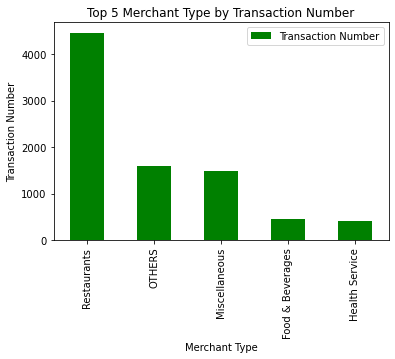

In [41]:
#Bentuk Grafik Top 5 Merchant Type by Transaction Number

gra_merchant2 = dfmerchant_type2.head().plot.bar(x = "Merchant Type", y = "Transaction Number", color = ['Green'])
gra_merchant2
gra_merchant2.set_title("Top 5 Merchant Type by Transaction Number")
gra_merchant2.set_xlabel("Merchant Type")
gra_merchant2.set_ylabel("Transaction Number")

## 3. Total Nominal Transaksi Merchant Criteria

In [42]:
#Pivot untuk Melihat Total Nominal dan Banyaknya Transaksi berdasarkan Merchant Criteria

dfmerchant_criteria = pd.pivot_table(df_merchantnew, index = ['Merchant Criteria'], aggfunc = {'Nominal':'sum'}).sort_values(by='Nominal', ascending=False).astype(int)
dfmerchant_criteria.reset_index(inplace = True)
dfmerchant_criteria.sort_values(by='Nominal', ascending = False).head()

,Merchant Criteria,Nominal
0,(UMI) Usaha Mikro,329054420
1,(UBE) Usaha Besar,249050420
2,(UKE) Usaha Kecil,179669798
3,(UME) Usaha Menengah,115644989
4,(URE) Usaha Reguler,1575924


Analisa:

- Dengan melihat Total Nominal Transaksi berdasarkan Merchant Type, BRI dapat melihat posisi Market Share BRI. Dengan melihat Market Share, BRI dapat membuat strategi penetrasi Market Share BRI yang masih rendah. 

- Data Market Share BRI dapat dibandingkan dengan data Market Share Issuer QRIS secara Nasional untuk membandingkan BRI dengan kompetitor.

- 3 Nominal Transaksi (Sales Volume) Tertinggi berdasarkan Merchant Criteria adalah Usaha Mikro, Usaha Besar, Usaha Kecil. Nominal Transaksi Terbesar pada Segmen Usaha Mikro (UMI) dengan nominal sebesar Rp.329.054.420.

- 2 Nominal Transaksi (Sales Volume) Terendah berdasarkan Merchant Criteria adalah Usaha Menengah dan Usaha Reguler. Nominal Transaksi Terkecil pada Segmen Usaha Reguler (URE) dengan nominal sebesar Rp.1.575.924.

- Dengan data Sales Volume berdasarkan Merchant Criteria. BRI dapat membuat strategi untuk mengoptimalkan segmen yang masih rendah. Berdasarkan data, segmen Usaha Reguler (URE) masih rendah sehingga dapat membuat program penetrasi yang lebih banyak pada segmen tersebut. Untuk segmen Usaha Mikro (UMI), dapat dibuat strategi maintenance yang baik agar transaksi tetap konsisten besar.

Text(0, 0.5, 'Nominal')

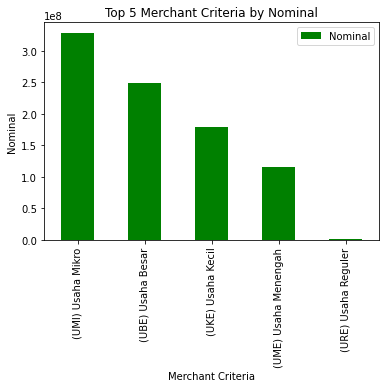

In [43]:
#Bentuk Grafik Top 5 Merchant Criteria by Nominal

gra_merchant3 = dfmerchant_criteria.head().plot.bar(x = "Merchant Criteria", y = "Nominal", color = ['Green'])
gra_merchant3
gra_merchant3.set_title("Top 5 Merchant Criteria by Nominal")
gra_merchant3.set_xlabel("Merchant Criteria")
gra_merchant3.set_ylabel("Nominal")

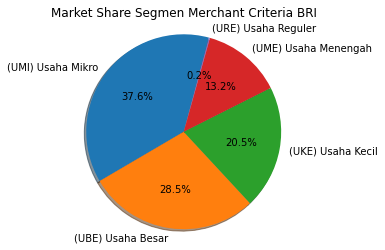

In [44]:
#Membuat Pie Chart

Merch_Criteria = dfmerchant_criteria['Merchant Criteria']
Merch_Nominal = dfmerchant_criteria['Nominal']

plt.pie(Merch_Nominal, labels = Merch_Criteria, autopct='%0.1f%%', shadow = True, startangle =75)
plt.title('Market Share Segmen Merchant Criteria BRI')
plt.axis('equal')
plt.show()

## 4. Banyaknya Transaksi Merchant Criteria

In [45]:
#Pivot untuk Melihat Total Nominal dan Banyaknya Transaksi berdasarkan Merchant Criteria

dfmerchant_criteria = pd.pivot_table(df_merchantnew, index = ['Merchant Criteria'], aggfunc = {'Transaction Number':'count'}).sort_values(by='Transaction Number', ascending=False).astype(int)
dfmerchant_criteria.reset_index(inplace = True)
dfmerchant_criteria.sort_values(by='Transaction Number', ascending = False).head()

,Merchant Criteria,Transaction Number
0,(UMI) Usaha Mikro,5008
1,(UBE) Usaha Besar,2479
2,(UKE) Usaha Kecil,1508
3,(UME) Usaha Menengah,984
4,(URE) Usaha Reguler,13


Analisa:

- Dengan melihat Jumlah Transaksi berdasarkan Merchant Criteria, BRI dapat melihat Segmen yang menghasilkan Transaksi terbanyak sehingga BRI dapat mengoptimalkan program promo atau marketing lainnya pada segmen tersebut.

- 3 Jumlah Transaksi (Trx) Tertinggi berdasarkan Merchant Criteria adalah Usaha Mikro, Usaha Besar, dan Usaha Kecil. Nominal Transaksi Terbesar pada segmen (UMI) Usaha Mikro dengan transaksi sebanyak 5008x

- 2 Jumlah Transaksi (Trx) Terendah berdasarkan Merchant Criteria adalah Usaha Menengah dan Usaha Reguler. Jumlah Transaksi Terkecil pada Tipe Usaha Reguler dengan transaksi hanya sebanyak 13x.

- Dengan melihat Jumlah Transaksi, BRI dapat memprioritaskan Segmen yang rendah untuk ditingkatkan program promo, brand awareness terkait iklan promo pada Merchant Criteria tersebut. Setiap bulannya dengan data ini, BRI dapat melihat Segmen apa yang memiliki Jumlah Transaksi yang tinggi sehingga dapat dioptimalkan untuk mendapatkan CASA. Data banyaknya transaksi dapat disandingkan dengan Total Nominal untuk melihat apakah banyaknya transaksi tersebut dapat menghasilkan Sales Volume yang besar atau tidak.

Text(0, 0.5, 'Nominal')

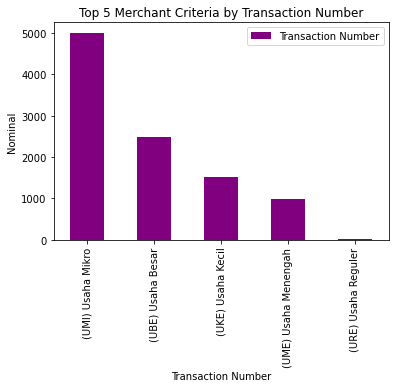

In [46]:
#Bentuk Grafik Top 5 Merchant Criteria by Transaction Number

gra_merchant3 = dfmerchant_criteria.head().plot.bar(x = "Merchant Criteria", y = "Transaction Number", color = ['Purple'])
gra_merchant3
gra_merchant3.set_title("Top 5 Merchant Criteria by Transaction Number")
gra_merchant3.set_xlabel("Transaction Number")
gra_merchant3.set_ylabel("Nominal")

## 5. Top 5 Issuer by Nominal & Transaction Number

In [47]:
#Pivot untuk Melihat Total Nominal dan Banyaknya Transaksi berdasarkan Issuer

dfmerchant_issuer = pd.pivot_table(df_merchantnew, index = ['Nama Issuer'], aggfunc = {'Nominal':'sum', 'Transaction Number':'count'}).astype(int)
dfmerchant_issuer.reset_index(inplace = True)
dfmerchant_issuer.sort_values(by='Nominal', ascending = False).head()

,Nama Issuer,Nominal,Transaction Number
8,BCA,286343819,1865
9,BNI,176433236,3976
35,MANDIRI,117759576,702
27,DANA,74241233,1147
17,BRI,67091929,372


Analisa:

- Berdasarkan data diatas, dapat dilihat 5 Besar Sumber Dana QRIS BRI. 5 Sumber Dana Terbesar yaitu BCA, BNI, Mandiri, Dana, dan BRI. Sumber Dana Terbesar yaitu BCA dengan Nominal Rp.286.343.819 sedangkan Jumlah Transaksi Terbesar yaitu BNI sebanyak 3976x transaksi 

## 6. Transaksi Off Us & On Us

In [48]:
#USING IF ELSE (TAGGING)

dfmerchant_issuer['Jenis Transaksi'] = np.nan
for i in range(0, len(dfmerchant_issuer)):
    if dfmerchant_issuer['Nama Issuer'][i] == 'BRI':
        dfmerchant_issuer['Jenis Transaksi'][i] = 'On Us'
    else:
        dfmerchant_issuer['Jenis Transaksi'][i] = 'Off Us'
        
dfmerchant_issuer.head()

C:\Users\IINDO 67\AppData\Local\Temp\ipykernel_8128\4063915645.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmerchant_issuer['Jenis Transaksi'][i] = 'Off Us'


,Nama Issuer,Nominal,Transaction Number,Jenis Transaksi
0,ARTHA GRAHA,136400,1,Off Us
1,ASTRAPAY,245000,3,Off Us
2,Allo Bank,763100,7,Off Us
3,BANK KEB HANA,214740,3,Off Us
4,BANK MEGA,759000,5,Off Us


### 6.1 Jumlah Nominal Jenis Transaksi Off Us & On Us

In [49]:
#Jumlah Nominal Jenis Transaksi Off Us & On Us

dfmerchant_issuer1 = pd.pivot_table(dfmerchant_issuer, index = ['Jenis Transaksi'], aggfunc = {'Nominal':'sum'}).astype(int)
dfmerchant_issuer1.reset_index(inplace = True)
dfmerchant_issuer1.sort_values(by='Nominal', ascending = False).head()

,Jenis Transaksi,Nominal
0,Off Us,807903622
1,On Us,67091929


### 6.2 Banyaknya Jenis Transaksi Off Us & On Us

In [50]:
#Jumlah Nominal Banyaknya Transaksi Off Us & On Us

dfmerchant_issuer2 = pd.pivot_table(dfmerchant_issuer, index = ['Jenis Transaksi'], aggfunc = {'Transaction Number':'sum'}).astype(int)
dfmerchant_issuer2.reset_index(inplace = True)
dfmerchant_issuer2.sort_values(by='Transaction Number', ascending = False).head()

,Jenis Transaksi,Transaction Number
0,Off Us,9620
1,On Us,372


### 6.3 Average Jenis Transaksi Off Us & On Us

In [51]:
#Average Transaksi Off Us & On Us

dfmerchant_issuer3 = pd.pivot_table(dfmerchant_issuer, index = ['Jenis Transaksi'], aggfunc = {'Nominal':'sum', "Transaction Number": 'sum'}).astype(int)
dfmerchant_issuer3.reset_index(inplace = True)
dfmerchant_issuer3.sort_values(by='Nominal', ascending = False).head()

dfmerchant_issuer3['Rata-Rata'] = dfmerchant_issuer3['Nominal']/dfmerchant_issuer3['Transaction Number']
dfmerchant_issuer3

,Jenis Transaksi,Nominal,Transaction Number,Rata-Rata
0,Off Us,807903622,9620,83981.665489
1,On Us,67091929,372,180354.647849


Analisa:

- Berdasarkan data diatas, dapat dilihat Total Nominal, Banyaknya Transaksi, dan Rata-Rata Transaksi berdasarkan Jenis Transaksi Off Us & On Us. Dengan menggunakan data ini, BRI dapat melihat jumlah transaksi QRIS dari luar BRI (Off Us) dan dalam BRI (On Us). Transaksi QRIS Off Us yang tinggi sangat baik untuk BRI yang dapat diartikan bahwa adanya fresh money yang masuk ke BRI sebagai CASA Fresh Fund. Analisa yang dapat dilakukan adalah melihat rata-rata Sales Volume per 1x Transaksi, hal ini dapat dijadikan evaluasi untuk melihat apakah nominal yang tinggi dari transaksi Off Us sudah efektif atau belum per transaksinya.

- Data ini dapat disandingkan dengan Merchant Criteria untuk membuat strategi promosi peningkatan transaksi. Contohnya: Jenis Transaksi On Us BRI lebih sedikit dibandingkan Transaksi Off Us, namun dari rata-rata Sales Volume/1x Transaksi lebih tinggi dibandingkan Off Us, artinya Transaksi On Us BRI memiliki Sales Volume yang Tinggi. Karena transaksi On Us berpotensi untuk menghasilkan Sales Volume yang Tinggi, BRI dapat mengencarkan promo/program melalui QRIS BRIMO sehingga dapat menghasilkan Sales Volume yang tinggi dikemudian hari. Promo untuk Jenis Transaksi On Us dapat lebih digencarkan untuk mendapatkan Sales Volume yang lebih besar dibandingkan dengan Banyaknya Transaksi. 

## Grafik Off Us & On Us

Text(0, 0.5, 'Nominal')

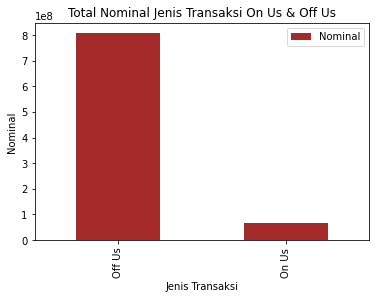

In [52]:
#Grafik Total Nominal Jenis Transaksi Off Us & On Us

gra_merchant4 = dfmerchant_issuer1.head().plot.bar(x = "Jenis Transaksi", y = "Nominal", color = ['Brown'])
gra_merchant4
gra_merchant4.set_title("Total Nominal Jenis Transaksi On Us & Off Us")
gra_merchant4.set_xlabel("Jenis Transaksi")
gra_merchant4.set_ylabel("Nominal")

Text(0, 0.5, 'Transaction Number')

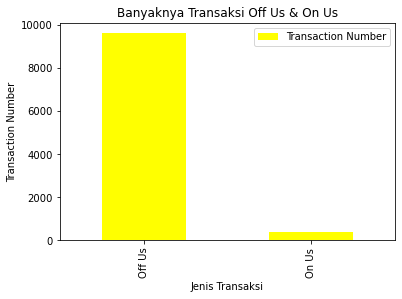

In [53]:
#Grafik Total Nominal Jenis Transaksi Off Us & On Us

gra_merchant5 = dfmerchant_issuer2.head().plot.bar(x = "Jenis Transaksi", y = "Transaction Number", color = ['Yellow'])
gra_merchant5
gra_merchant5.set_title("Banyaknya Transaksi Off Us & On Us")
gra_merchant5.set_xlabel("Jenis Transaksi")
gra_merchant5.set_ylabel("Transaction Number")

# Tagging in Python

In [54]:
#Jelaskan secara singkat hasil analisa berdasarkan data 10.000

df_merchantnew.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type
0,B005215005,X610005448,DANA,100000.0,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
1,B005214931,X610110384,DANA,150000.0,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants
2,B005214895,X612094437,DANA,20000.0,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores
3,B005744332,X610110454,DANA,100000.0,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants
4,B005214792,X610115833,DANA,50000.0,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous


Pengelompokan Jam akan dibagi menjadi:

1. Dini Hari (00.00-05.00)
2. Pagi Hari (06.00-11.00)
3. Siang Hari (12.00-15.00)
4. Sore Hari (16.00-18.00)
5. Malam Hari (19.00-23.00)

In [55]:
#Using .loc (Tagging)

df_merchantnew.loc[df_merchantnew['Jam'] >= 6 , "Kategori Waktu"] = 'Pagi'
df_merchantnew.loc[df_merchantnew['Jam'] >= 12 , "Kategori Waktu"] = 'Siang'
df_merchantnew.loc[df_merchantnew['Jam'] >= 16 , "Kategori Waktu"] = 'Sore'
df_merchantnew.loc[df_merchantnew['Jam'] >= 19 , "Kategori Waktu"] = 'Malam'
df_merchantnew.loc[df_merchantnew['Jam'] < 5 , "Kategori Waktu"] = 'Dini Hari'
df_merchantnew.head()

C:\Users\IINDO 67\AppData\Local\Temp\ipykernel_8128\2773864236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merchantnew.loc[df_merchantnew['Jam'] >= 6 , "Kategori Waktu"] = 'Pagi'


,Transaction Number,Merchant ID,Nama Issuer,Nominal,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type,Kategori Waktu
0,B005215005,X610005448,DANA,100000.0,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
1,B005214931,X610110384,DANA,150000.0,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
2,B005214895,X612094437,DANA,20000.0,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Malam
3,B005744332,X610110454,DANA,100000.0,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
4,B005214792,X610115833,DANA,50000.0,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous,Malam


In [56]:
#Drop Kolom Waktu dan Bulan

df_new = df_merchantnew.drop(columns= ['Waktu','Bulan'])
df_new.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Tanggal,Jam,Day,Month,Merchant Criteria,Merchant Type,Kategori Waktu
0,B005215005,X610005448,DANA,100000.0,10,23,Sunday,July,(UMI) Usaha Mikro,Restaurants,Malam
1,B005214931,X610110384,DANA,150000.0,10,23,Sunday,July,(UMI) Usaha Mikro,Restaurants,Malam
2,B005214895,X612094437,DANA,20000.0,10,23,Sunday,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Malam
3,B005744332,X610110454,DANA,100000.0,20,23,Wednesday,July,(UMI) Usaha Mikro,Restaurants,Malam
4,B005214792,X610115833,DANA,50000.0,10,23,Sunday,July,(UMI) Usaha Mikro,Miscellaneous,Malam


## 9. Banyaknya Transaksi berdasarkan Kategori Waktu

In [57]:
#Berapa Kali Transaksi Setiap Merchant Type berdasarkan Kategori Waktu

dfpivotnew1 = pd.pivot_table(df_new, index=["Merchant Type"],columns= ['Kategori Waktu'], aggfunc={"Kategori Waktu":"count"})
dfpivotnew1.reset_index(inplace=True)
dfpivotnew1.fillna(0).head(5)

Merchant Type Kategori Waktu                    \
Kategori Waktu                                Dini Hari Malam  Pagi Siang   
0                      Automobile Rental            0.0  23.0  43.0  71.0   
1               Automobiles And Vehicles           20.0  62.0  38.0  31.0   
2                               Clothing            0.0  13.0  26.0  65.0   
3                     Community Agencies            3.0   6.0  41.0  23.0   
4                               Computer            0.0   0.0   2.0   1.0   

                      
Kategori Waktu  Sore  
0               41.0  
1               25.0  
2               55.0  
3                9.0  
4                2.0

### Dini Hari

In [58]:
#Sort Transaksi Terbanyak Kategori Waktu

dfpivotnew1_2 = dfpivotnew1.reindex(dfpivotnew1["Kategori Waktu"].sort_values(by='Dini Hari', ascending=False).index)
dfpivotnew1_2.fillna(0)
dfpivotnew1_2.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew1_2.drop(columns = ['Malam', 'Pagi', 'Siang','Sore']).head(3)

,Merchant Type,Dini Hari
16,Restaurants,134.0
14,Miscellaneous,66.0
10,Health Service,29.0


### Pagi

In [59]:
dfpivotnew1_3 = dfpivotnew1.reindex(dfpivotnew1["Kategori Waktu"].sort_values(by='Pagi', ascending=False).index)
dfpivotnew1_3.fillna(0)
dfpivotnew1_3.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew1_3.drop(columns = ['Malam', 'Dini Hari', 'Siang','Sore']).head(3)

,Merchant Type,Pagi
15,OTHERS,965.0
16,Restaurants,833.0
14,Miscellaneous,254.0


### Siang

In [60]:
dfpivotnew1_4 = dfpivotnew1.reindex(dfpivotnew1["Kategori Waktu"].sort_values(by='Siang', ascending=False).index)
dfpivotnew1_4.fillna(0)
dfpivotnew1_4.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew1_4.drop(columns = ['Malam', 'Dini Hari', 'Pagi','Sore']).head(3)

,Merchant Type,Siang
16,Restaurants,1414.0
15,OTHERS,584.0
14,Miscellaneous,431.0


### Sore

In [61]:
dfpivotnew1_5 = dfpivotnew1.reindex(dfpivotnew1["Kategori Waktu"].sort_values(by='Sore', ascending=False).index)
dfpivotnew1_5
dfpivotnew1_5.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew1_5.drop(columns = ['Malam', 'Dini Hari', 'Pagi','Siang']).head(3)

,Merchant Type,Sore
16,Restaurants,1068.0
14,Miscellaneous,384.0
9,Food & Beverages,158.0


### Malam

In [62]:
dfpivotnew1_6 = dfpivotnew1.reindex(dfpivotnew1["Kategori Waktu"].sort_values(by='Malam', ascending=False).index)
dfpivotnew1_6.fillna(0)
dfpivotnew1_6.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew1_6.drop(columns = ['Sore', 'Dini Hari', 'Pagi','Siang']).head(3)

,Merchant Type,Malam
16,Restaurants,1006.0
14,Miscellaneous,342.0
9,Food & Beverages,85.0


#### Cara Lain Sort Values per Kategori Waktu

In [63]:
#Cara lain Sort Values per Kategori Waktu

dfpivotnew33 = pd.pivot_table(df_new, index=["Merchant Type"],columns= ['Kategori Waktu'], aggfunc={"Kategori Waktu":"count"})
dfpivotnew33.reset_index(inplace=True)
dfpivotnew33.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfpivotnew33 = dfpivotnew33.fillna(0)

dfpivotnew33[['Merchant Type','Dini Hari']].sort_values(by='Dini Hari', ascending = False).head(3)

,Merchant Type,Dini Hari
16,Restaurants,134.0
14,Miscellaneous,66.0
10,Health Service,29.0


Analisa:

1. Berdasarkan Data Jumlah Transaksi Merchant Type per Kategori Waktu, ditemukan bahwa:
    
    a. Pada Dini Hari (00.00 - 05.00), Merchant Type Restoran memiliki jumlah  transaksi tertinggi yaitu sebesar 134x Transaksi
    
    b. Pada Pagi Hari (06.00 - 11.00), Merchant Type Others memiliki jumlah transaksi tertinggi yaitu sebesar 965x Transaksi dan Restoran sebesar 833x Transaksi
    
    c. Pada Siang Hari (12.00 - 15.00), Merchant Type Restoran memiliki jumlah transaksi tertinggi yaitu sebesar 1414x Transaksi
    
    d. Pada Sore Hari (16.00 - 18.00), Merchant Type Restoran memiliki jumlah transaksi tertinggi yaitu sebesar 1068x Transaksi
    
    e. Pada Malam Hari (19.00 - 23.00), Merchant Type Restoran memiliki jumlah transaksi tertinggi yaitu sebesar 1006x Transaksi


2. Dengan data diatas, BRI dapat memanfaatkan data tersebut untuk menganalisa fase peak hour Merchant Type Tertentu. Data ini sangat berguna untuk menentukan pembuatan promo sehingga promo tersebut dapat digunakan oleh customer secara tepat waktu


3. Terlihat bahwa transaksi di Merchant BRI didominasi oleh Merchant Type Restoran, BRI dapat memanfaatkan data ini untuk membuat strategi promosi Merchant pada waktu yang tepat. Apabila dari data, BRI dapat membuat Promo Restoran pada waktu Siang Hari-Sore Hari

### Grafik Banyaknya Transaksi per Kategori Waktu

<AxesSubplot:title={'center':'Banyaknya Transaksi per Kategori Waktu'}, xlabel='Merchant Type', ylabel='Banyaknya Transaksi'>

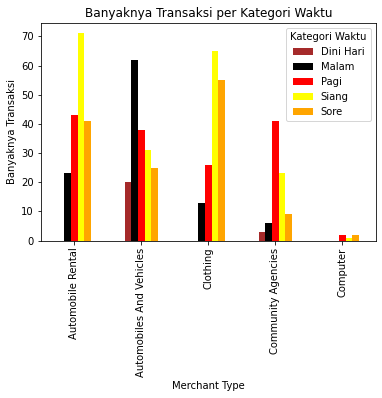

In [64]:
gra_waktu1 = dfpivotnew1.head().plot.bar(x = "Merchant Type", y = "Kategori Waktu", color = ['Brown','Black', 'Red', 'Yellow', 'Orange'])
gra_waktu1.set_title("Banyaknya Transaksi per Kategori Waktu")
gra_waktu1.set_xlabel("Merchant Type")
gra_waktu1.set_ylabel("Banyaknya Transaksi")
gra_waktu1

## 10. Banyaknya Transaksi berdasarkan Merchant Criteria

In [65]:
#Berapa Kali Transaksi Setiap Merchant Criteria

dfpivotnew2 = pd.pivot_table(df_new, index=["Merchant Criteria"],columns= ['Kategori Waktu'], aggfunc={"Kategori Waktu":"count"})
dfpivotnew2.reset_index(inplace=True)
dfpivotnew2.fillna(0)

Merchant Criteria Kategori Waktu                         \
Kategori Waktu                            Dini Hari  Malam    Pagi   Siang   
0                  (UBE) Usaha Besar           42.0  490.0   460.0   778.0   
1                  (UKE) Usaha Kecil           23.0  264.0   338.0   553.0   
2               (UME) Usaha Menengah            5.0  203.0   224.0   319.0   
3                  (UMI) Usaha Mikro          217.0  886.0  1599.0  1490.0   
4                (URE) Usaha Reguler            0.0    2.0     4.0     3.0   

                       
Kategori Waktu   Sore  
0               696.0  
1               328.0  
2               232.0  
3               806.0  
4                 4.0

Analisa:

- Data diatas dapat digunakan untuk melihat banyaknya transakasi segmen BRI berdasarkan kategori waktu, hal ini dapat memudahkan BRI untuk melihat segmen usaha Merchant BRI lebih aktif pada fase waktu apa.

### Grafik Banyaknya Transaksi per Kategori Waktu

<AxesSubplot:title={'center':'Banyaknya Transaksi per Kategori Waktu'}, xlabel='Merchant Type', ylabel='Banyaknya Transaksi'>

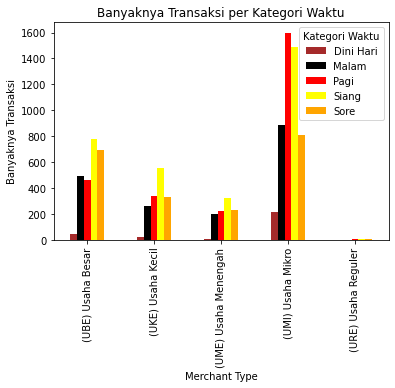

In [66]:
gra_waktu2 = dfpivotnew2.head().plot.bar(x = "Merchant Criteria", y = "Kategori Waktu", color = ['Brown','Black', 'Red', 'Yellow', 'Orange'])
gra_waktu2.set_title("Banyaknya Transaksi per Kategori Waktu")
gra_waktu2.set_xlabel("Merchant Type")
gra_waktu2.set_ylabel("Banyaknya Transaksi")
gra_waktu2

## 11. Jumlah Nominal Tiap Merchant Criteria Berdasarkan Kategori Waktu

In [67]:
#Berapa Jumlah Nominal Transaksi Setiap Merchant Type berdasarkan Kategori Waktu

dfpivotnew3 = pd.pivot_table(df_new, index=["Merchant Type"],columns= ['Kategori Waktu'], aggfunc={"Nominal":"sum"})
dfpivotnew3.reset_index(inplace=True)
dfpivotnew3.fillna(0)

Merchant Type     Nominal              \
Kategori Waktu                               Dini Hari       Malam   
0                        Automobile Rental         0.0    936000.0   
1                 Automobiles And Vehicles   1119817.0   4457713.0   
2                                 Clothing         0.0   2351003.0   
3                       Community Agencies     16000.0    400000.0   
4                                 Computer         0.0         0.0   
5                        Department Stores         0.0   6017848.0   
6                                Education         0.0    145000.0   
7                               Electronic         0.0    288000.0   
8                            Entertainment         0.0   4244601.0   
9                         Food & Beverages     15000.0   9524110.0   
10                          Health Service   3413740.0  13032517.0   
11                           Hobbies/Gift          0.0     48000.0   
12                         Home Furnishing         0.0  11588500.0   
13                         Hotels & Motels    944800.0    333150.0   
14                           Miscellaneous   5746895.0  33882869.0   
15                                  OTHERS    400001.0    314901.0   
16                             Restaurants  15569284.0  89234160.0   
17                           Shoes And Bag         0.0   1693000.0   
18                     Stationaries/Office         0.0    709050.0   
19              Supermarket/Grocery Stores   3586715.0   8690797.0   
20                       Telecommunication     30000.0   1749500.0   
21                          Transportation    225000.0   1598000.0   
22                                  Travel         0.0         0.0   
23                       Watches & Jewelry         0.0       100.0   

                                                      
Kategori Waktu        Pagi        Siang         Sore  
0                 124000.0    1046000.0     139000.0  
1                4950188.0    2020691.0    1792716.0  
2                6553906.0   13652934.0   11567033.0  
3               11350076.0    2401417.0    3989000.0  
4                 185003.0    2500000.0    1485000.0  
5                1132500.0    3555025.0    2465330.0  
6                 530000.0      85000.0          0.0  
7                 150000.0    1114000.0    1900000.0  
8                5089964.0   11580789.0    8255916.0  
9               11297424.0   13398110.0   16887539.0  
10              27359640.0   29662743.0    9942615.0  
11                     0.0          0.0          0.0  
12               6674123.0    2578400.0    9555986.0  
13               5143848.0    5765600.0    6850500.0  
14              29817652.0   31099036.0   27700270.0  
15                305742.0     307827.0     481728.0  
16              61797731.0  111994499.0  101034079.0  
17                     0.0    1534000.0      80000.0  
18                804136.0    1174303.0     253501.0  
19               4859871.0    6439406.0    7048257.0  
20               4688000.0    1470002.0     141504.0  
21               2781601.0    7905713.0     678200.0  
22                 79000.0     404000.0       4000.0  
23                155003.0          3.0     200000.0

In [68]:
#Pivot Merchant Type dengan Kategori Waktu

dfmerchtype = pd.pivot_table(df_new, index=["Merchant Type"],columns= ['Kategori Waktu'], aggfunc={"Nominal":"sum"})
dfmerchtype.reset_index(inplace=True)
dfmerchtype.columns = ['Merchant Type', 'Dini Hari', 'Malam','Pagi','Siang','Sore']
dfmerchtype = dfmerchtype.fillna(0)
dfmerchtype

,Merchant Type,Dini Hari,Malam,Pagi,Siang,Sore
0,Automobile Rental,0.0,936000.0,124000.0,1046000.0,139000.0
1,Automobiles And Vehicles,1119817.0,4457713.0,4950188.0,2020691.0,1792716.0
2,Clothing,0.0,2351003.0,6553906.0,13652934.0,11567033.0
3,Community Agencies,16000.0,400000.0,11350076.0,2401417.0,3989000.0
4,Computer,0.0,0.0,185003.0,2500000.0,1485000.0
5,Department Stores,0.0,6017848.0,1132500.0,3555025.0,2465330.0
6,Education,0.0,145000.0,530000.0,85000.0,0.0
7,Electronic,0.0,288000.0,150000.0,1114000.0,1900000.0
8,Entertainment,0.0,4244601.0,5089964.0,11580789.0,8255916.0
9,Food & Beverages,15000.0,9524110.0,11297424.0,13398110.0,16887539.0


### Dini Hari

In [69]:
#Melihat Dini Hari

dinihari = dfmerchtype[['Merchant Type','Dini Hari']].sort_values(by='Dini Hari', ascending = False)
dinihari.head(3)

,Merchant Type,Dini Hari
16,Restaurants,15569284.0
14,Miscellaneous,5746895.0
19,Supermarket/Grocery Stores,3586715.0


### Pagi

In [70]:
#Melihat Pagi Hari

pagi = dfmerchtype[['Merchant Type','Pagi']].sort_values(by='Pagi', ascending = False)
pagi.head(3)

,Merchant Type,Pagi
16,Restaurants,61797731.0
14,Miscellaneous,29817652.0
10,Health Service,27359640.0


### Siang

In [71]:
#Melihat Siang Hari

siang = dfmerchtype[['Merchant Type','Siang']].sort_values(by='Siang', ascending = False)
siang.head(3)

,Merchant Type,Siang
16,Restaurants,111994499.0
14,Miscellaneous,31099036.0
10,Health Service,29662743.0


### Sore

In [72]:
#Melihat Sore Hari

sore = dfmerchtype[['Merchant Type','Sore']].sort_values(by='Sore', ascending = False)
sore.head(3)

,Merchant Type,Sore
16,Restaurants,101034079.0
14,Miscellaneous,27700270.0
9,Food & Beverages,16887539.0


### Malam

In [73]:
#Melihat Malam Hari

malam = dfmerchtype[['Merchant Type','Malam']].sort_values(by='Malam', ascending = False)
malam.head(3)

,Merchant Type,Malam
16,Restaurants,89234160.0
14,Miscellaneous,33882869.0
10,Health Service,13032517.0


Analisa:

- Data diatas dapat digunakan untuk melihat Sales Volume tertinggi berada pada fase waktu apa, dari data tersebut dapat dilihat bahwa Merchant Type Restaurants sangat tinggi baik Dini Hari, Pagi, Siang, Sore, dan Malam. Merchant Type Restaurant menghasilkan Sales Volume tertinggi pada Siang Hari sebesar Rp. 111.994.499. Data ini juga dapat digunakan untuk mencari Sales Volume berdasarkan Merchant Type tertentu untuk mementukan strategi promo akan dilakukan pada fase waktu apa. Misalnya: Apabila BRI ingin meningkatkan Sales Volume dengan Merchant Type Supermarket/Grocery Stores, dengan melihat ini BRI dapat menentukan pembuatan promo dengan rentang waktu yang tepat.

## 12. Produktivitas Merchant 

In [74]:
#Show Dataframe

df_merchantnew_1= df_merchantnew
df_merchantnew_1.head()

,Transaction Number,Merchant ID,Nama Issuer,Nominal,Tanggal,Waktu,Jam,Day,Bulan,Month,Merchant Criteria,Merchant Type,Kategori Waktu
0,B005215005,X610005448,DANA,100000.0,10,23:44:59,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
1,B005214931,X610110384,DANA,150000.0,10,23:36:31,23,Sunday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
2,B005214895,X612094437,DANA,20000.0,10,23:32:14,23,Sunday,7,July,(UMI) Usaha Mikro,Supermarket/Grocery Stores,Malam
3,B005744332,X610110454,DANA,100000.0,20,23:32:39,23,Wednesday,7,July,(UMI) Usaha Mikro,Restaurants,Malam
4,B005214792,X610115833,DANA,50000.0,10,23:18:16,23,Sunday,7,July,(UMI) Usaha Mikro,Miscellaneous,Malam


In [75]:
#Pivot Data Frame Nominal & Transaction Number

dfpivot_nana = pd.pivot_table(df_merchantnew_1, index=["Merchant ID",'Merchant Criteria','Merchant Type','Day'], aggfunc={"Transaction Number":"count", 'Nominal':'sum'})
dfpivot_nana

Nominal  \
Merchant ID Merchant Criteria    Merchant Type              Day                    
X1010172    (UKE) Usaha Kecil    Restaurants                Tuesday     226600.0   
X11017480   (UME) Usaha Menengah Supermarket/Grocery Stores Tuesday      80000.0   
X12000017   (UBE) Usaha Besar    Hotels & Motels            Wednesday        1.0   
X12126900   (UBE) Usaha Besar    Home Furnishing            Saturday   2878520.0   
X12208583   (UBE) Usaha Besar    Health Service             Friday      134000.0   
...                                                                          ...   
X618500136  (UMI) Usaha Mikro    OTHERS                     Thursday         3.0   
                                                            Tuesday          2.0   
                                                            Wednesday        1.0   
X6990048    (UBE) Usaha Besar    Food & Beverages           Tuesday     242000.0   
X8064420    (UKE) Usaha Kecil    Food & Beverages           Wednesday   156150.0   

                                                                       Transaction Number  
Merchant ID Merchant Criteria    Merchant Type              Day                            
X1010172    (UKE) Usaha Kecil    Restaurants                Tuesday                     1  
X11017480   (UME) Usaha Menengah Supermarket/Grocery Stores Tuesday                     1  
X12000017   (UBE) Usaha Besar    Hotels & Motels            Wednesday                   1  
X12126900   (UBE) Usaha Besar    Home Furnishing            Saturday                    1  
X12208583   (UBE) Usaha Besar    Health Service             Friday                      1  
...                                                                                   ...  
X618500136  (UMI) Usaha Mikro    OTHERS                     Thursday                    3  
                                                            Tuesday                     2  
                                                            Wednesday                   1  
X6990048    (UBE) Usaha Besar    Food & Beverages           Tuesday                     1  
X8064420    (UKE) Usaha Kecil    Food & Beverages           Wednesday                   1  

[5519 rows x 2 columns]

In [76]:
#Tagging

dfpivot_nana.loc[dfpivot_nana['Nominal'] >= 500000 , "Produktivitas by Nominal"] = 'Produktif'
dfpivot_nana.loc[dfpivot_nana['Nominal'] <= 500000 , "Produktivitas by Nominal"] = 'Tidak Produktif'
dfpivot_nana.loc[dfpivot_nana['Transaction Number'] >= 120 , "Produktivitas by Trx"] = 'Produktif'
dfpivot_nana.loc[dfpivot_nana['Transaction Number'] <= 120 , "Produktivitas by Trx"] = 'Tidak Produktif'
dfpivot_nana.head()

#DITAMBAHKAN OFF US/ON US untuk melihat transaksinya
#Kalo yg Off Us lebih Produktif --> Campaign untuk trx lebih banyak (untuk merchantnya spt ngasih diskon MDR), trx menggunakan BRI kalo On US

,,,,Nominal,Transaction Number,Produktivitas by Nominal,Produktivitas by Trx
Merchant ID,Merchant Criteria,Merchant Type,Day,,,,
X1010172,(UKE) Usaha Kecil,Restaurants,Tuesday,226600.0,1,Tidak Produktif,Tidak Produktif
X11017480,(UME) Usaha Menengah,Supermarket/Grocery Stores,Tuesday,80000.0,1,Tidak Produktif,Tidak Produktif
X12000017,(UBE) Usaha Besar,Hotels & Motels,Wednesday,1.0,1,Tidak Produktif,Tidak Produktif
X12126900,(UBE) Usaha Besar,Home Furnishing,Saturday,2878520.0,1,Produktif,Tidak Produktif
X12208583,(UBE) Usaha Besar,Health Service,Friday,134000.0,1,Tidak Produktif,Tidak Produktif


Notes: 

Data di Tag berdasarkan:

a. Produktivitas by Nominal, jika >= Rp.500.000 Merchant Produktif dan jika <= Rp.500.000 Merchant Tidak Produktif

b. Produktivitas by Trx, jika >= 120 Merchant Produktif dan jika <= 120 Merchant Tidak Produktif

### 12.1 Produktivitas by Nominal

In [77]:
#Produktivitas by Nominal

#dfpivotnana_2 = dfpivot_nana.reset_index(inplace=True)
dfpivotnana_2 = pd.pivot_table(dfpivot_nana, index=["Produktivitas by Nominal"],aggfunc={"Produktivitas by Nominal":"count"})
dfpivotnana_2

,Produktivitas by Nominal
Produktivitas by Nominal,
Produktif,333
Tidak Produktif,5186


### 12.2  Produktivitas by Trx

In [78]:
#Produktivitas by Trx

#dfpivotnana_2 = dfpivot_nana.reset_index(inplace=True)
dfpivotnana_2 = pd.pivot_table(dfpivot_nana, index=["Produktivitas by Trx"],aggfunc={"Produktivitas by Trx":"count"})
dfpivotnana_2

,Produktivitas by Trx
Produktivitas by Trx,
Produktif,2
Tidak Produktif,5517


In [79]:
#MELIHAT MERCHANT DENGAN PRODUKTIVITAS TERBAIK!!!

dfpivot_nana[dfpivot_nana['Produktivitas by Trx'] == 'Produktif']

Nominal  \
Merchant ID Merchant Criteria Merchant Type Day                   
X610002918  (UMI) Usaha Mikro Miscellaneous Saturday  2114602.0   
                                            Sunday    2347500.0   

                                                      Transaction Number  \
Merchant ID Merchant Criteria Merchant Type Day                            
X610002918  (UMI) Usaha Mikro Miscellaneous Saturday                 214   
                                            Sunday                   301   

                                                     Produktivitas by Nominal  \
Merchant ID Merchant Criteria Merchant Type Day                                 
X610002918  (UMI) Usaha Mikro Miscellaneous Saturday                Produktif   
                                            Sunday                  Produktif   

                                                     Produktivitas by Trx  
Merchant ID Merchant Criteria Merchant Type Day                            
X610002918  (UMI) Usaha Mikro Miscellaneous Saturday            Produktif  
                                            Sunday              Produktif

Analisa 12.1 dan 12.2:

- Data Produktivitas Transaksi by Nominal dan Produktivitas by Transaksi dapat berguna untuk BRI sebagai acuan analisa Merchant ID yang Produktif dan Tidak Produktif. Setiap bulannya data ini dapat dijadikan alat monitoring Produktivitas Merchant ID se-Indonesia dengan standar produktivitas yang telah ditetapkan. Produktivitas by Nominal untuk melihat Merchant ID yang telah memiliki Sales Volume >= Rp.500.000 sedangkan Produktivitas by Transaksi untuk Melihat Merchant ID yang telah memiliki Transaksi sejumlah >=120.


- Data Produktivitas yang belum produktif dapat dievaluasi oleh Kantor Wilayah untuk dilakukan Maintenance agar dapat produktif. Data ini dapat menjadi acuan untuk membuat strategi peningkatkan Merchant untuk lebih produktif dalam menghasilkan Sales Volume dan Jumlah Transaksi

## 13. Produktivitas berdasarkan Merchant Criteria

In [80]:
#Produktivitas berdasarkan Merchant Criteria

dfpivotnana_3 = pd.pivot_table(dfpivot_nana, index=["Merchant Criteria"],columns = ["Produktivitas by Trx"], aggfunc={"Produktivitas by Nominal":"count" })
dfpivotnana_3 = dfpivotnana_3.fillna(0)
dfpivotnana_3

Produktivitas by Nominal                
Produktivitas by Trx                Produktif Tidak Produktif
Merchant Criteria                                            
(UBE) Usaha Besar                         0.0          1586.0
(UKE) Usaha Kecil                         0.0           992.0
(UME) Usaha Menengah                      0.0           778.0
(UMI) Usaha Mikro                         2.0          2149.0
(URE) Usaha Reguler                       0.0            12.0

Analisa:

- Data diatas dapat digunakan untuk melihat Irisan Segmen Merchant BRI yang Memiliki Produktivitas by Nominal dan Produktivitas by Trx yang Produktif. Dari data tersebut dapat dilihat bahwa UMI (Usaha Mikro) memiliki Jumlah Merchant Tidak Produktif yang cukup banyak. Data ini dapat dijadikan BRI untuk menganalisa tingkat Produktivitas setiap segmen sehingga dapat dibuat strategi untuk peningkatkan produktivitas dari sisi Sales Volume dan Banyaknya Transaksi sesuai segmen masing-masing

## 14. Produktivitas berdasarkan Merchant Type

In [81]:
#Produktivitas berdasarkan Merchant Type

dfpivotnana_4 = pd.pivot_table(dfpivot_nana, index=["Merchant Type"],columns = ["Produktivitas by Trx"], aggfunc={"Produktivitas by Nominal":"count" })
dfpivotnana_4 = dfpivotnana_4.fillna(0)
dfpivotnana_4

Produktivitas by Nominal                
Produktivitas by Trx                      Produktif Tidak Produktif
Merchant Type                                                      
Automobile Rental                               0.0             7.0
Automobiles And Vehicles                        0.0            46.0
Clothing                                        0.0           134.0
Community Agencies                              0.0            66.0
Computer                                        0.0             4.0
Department Stores                               0.0            23.0
Education                                       0.0             5.0
Electronic                                      0.0            16.0
Entertainment                                   0.0           272.0
Food & Beverages                                0.0           288.0
Health Service                                  0.0           228.0
Hobbies/Gift                                    0.0             2.0
Home Furnishing                                 0.0            28.0
Hotels & Motels                                 0.0            44.0
Miscellaneous                                   2.0           555.0
OTHERS                                          0.0           583.0
Restaurants                                     0.0          2920.0
Shoes And Bag                                   0.0             5.0
Stationaries/Office                             0.0            19.0
Supermarket/Grocery Stores                      0.0           124.0
Telecommunication                               0.0            41.0
Transportation                                  0.0            96.0
Travel                                          0.0             5.0
Watches & Jewelry                               0.0             6.0

Analisa:

- Data diatas dapat digunakan untuk melihat Merchant Type BRI yang Memiliki Produktivitas by Nominal dan Produktivitas by Trx yang Produktif. Dari data tersebut dapat dilihat hanya Merchant Type Miscellaneous yang memiliki Merchant Produktif yang banyak. Data ini dapat dijadikan BRI untuk menganalisa tingkat Produktivitas setiap Merchant Type sehingga dapat dibuat strategi untuk peningkatan produktivitas dari sisi Sales Volume dan Banyaknya Transaksi sesuai segmen masing-masing.


- Dari data sebelumnya dapat dilihat bahwa Merchant Type Restaurants memiliki transaksi yang tinggi dari sisi jumlah maupun Sales Volume, namun dari data atas diatas terlihat bahwa Restaurants belum dapat dikatakan Produktif dari sisi Sales Volume dan Banyaknya Transaksi. Data ini bisa dijadikan acuan untuk melihat lebih detail terkait Sales Volume dan Banyaknya Transaksi yang tinggi apakah produktif atau tidak.

### Time Series

In [82]:
#Time Series Merchant Criteria

dfpivot_timeseries = pd.pivot_table(df_merchantnew_1, index=['Tanggal'], columns = 'Merchant Criteria' ,values = 'Nominal', aggfunc = {'Nominal' : 'sum'}, margins=True, margins_name = 'Total').reset_index()
dfpivot_timeseries = dfpivot_timeseries.fillna(0)
dfpivot_timeseries = dfpivot_timeseries.drop(dfpivot_timeseries.index[[31]])
dfpivot_timeseries

Merchant Criteria,Tanggal,(UBE) Usaha Besar,(UKE) Usaha Kecil,(UME) Usaha Menengah,(UMI) Usaha Mikro,(URE) Usaha Reguler,Total
0,1,4216397.0,11481637.0,2872850.0,10172529.0,0.0,28743413.0
1,2,10119540.0,14483517.0,2610594.0,13264685.0,0.0,40478336.0
2,3,6572289.0,9089959.0,1900880.0,10815154.0,0.0,28378282.0
3,4,5332499.0,5105852.0,3344700.0,4150536.0,47000.0,17980587.0
4,5,16579592.0,6460081.0,2533373.0,9304123.0,140000.0,35017169.0
5,6,22332009.0,5357527.0,3958237.0,6756010.0,244200.0,38647983.0
6,7,22843194.0,6123525.0,5678928.0,6007074.0,0.0,40652721.0
7,8,3799069.0,3696253.0,2094700.0,6784686.0,0.0,16374708.0
8,9,8592992.0,4755355.0,2477501.0,8690415.0,285054.0,24801317.0
9,10,8249388.0,3368568.0,1712100.0,13490209.0,0.0,26820265.0


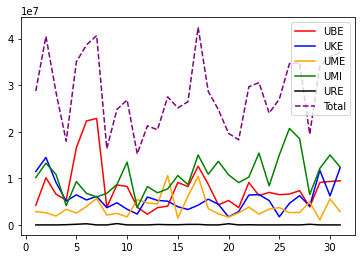

In [83]:
#Grafik Merchant Criteria

fix,ax = plt.subplots()
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["(UBE) Usaha Besar"], color = "red", label = "UBE", linestyle="-")
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["(UKE) Usaha Kecil"], color = "blue", label = "UKE", linestyle="-")
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["(UME) Usaha Menengah"], color = "orange", label = "UME", linestyle="-")
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["(UMI) Usaha Mikro"], color = "green", label = "UMI", linestyle="-")
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["(URE) Usaha Reguler"], color = "black", label = "URE", linestyle="-")
ax.plot(dfpivot_timeseries["Tanggal"], dfpivot_timeseries["Total"], color = "Purple", label = "Total", linestyle="--")
ax.legend()

## 14. Sales Volume & Banyaknya Transaksi per Hari berdasarkan Merchant Type

In [84]:
# Sales Volume & Banyaknya Transaksi per Hari berdasarkan Merchant Type

dfpivotdays = pd.pivot_table(dfpivot_nana, index=["Merchant Type",'Day'],aggfunc={"Transaction Number":"sum", 'Nominal':'sum'})
dfpivotdays

Nominal  Transaction Number
Merchant Type     Day                                    
Automobile Rental Friday     170000.0                  27
                  Monday    1029000.0                  32
                  Saturday   342000.0                  23
                  Sunday     259000.0                   7
                  Thursday    96000.0                  35
...                               ...                 ...
Watches & Jewelry Friday          3.0                   1
                  Saturday   150000.0                   1
                  Sunday     200000.0                   1
                  Thursday      100.0                   1
                  Tuesday      5003.0                   2

[148 rows x 2 columns]

In [85]:
#Melihat Merchant Type Restaurant

dfpivotdays = dfpivotdays.reset_index()
dfpivotdays[dfpivotdays['Merchant Type']== 'Restaurants'].sort_values(by='Nominal', ascending = False)

,Merchant Type,Day,Nominal,Transaction Number
101,Restaurants,Saturday,70588709.0,659
102,Restaurants,Sunday,62079835.0,627
103,Restaurants,Thursday,57611477.0,807
99,Restaurants,Friday,55383036.0,647
104,Restaurants,Tuesday,54415168.0,602
105,Restaurants,Wednesday,51251643.0,719
100,Restaurants,Monday,28925885.0,400


In [86]:
#Melihat Merchant Type Entertainment

dfpivotdays[dfpivotdays['Merchant Type']== 'Entertainment'].sort_values(by='Nominal', ascending = False)

,Merchant Type,Day,Nominal,Transaction Number
52,Entertainment,Sunday,6192661.0,96
51,Entertainment,Saturday,5947110.0,139
49,Entertainment,Friday,5399017.0,26
50,Entertainment,Monday,3990082.0,29
53,Entertainment,Thursday,3625228.0,24
54,Entertainment,Tuesday,2590500.0,17
55,Entertainment,Wednesday,1426672.0,20


Analisa:

- Data diatas dapat digunakan untuk melihat Sales Volume & Banyaknya Transaksi berdasarkan Hari, data ini dapat digunakan BRI untuk menganalisa suatu Merchant Type lebih ramai di hari apa sehingga dapat dijadikan acuan pembuatan promo, iklan marketing, dan peningkatan kualitas Call Center terkait Merchant


- Apabila BRI ingin meningkatkan Sales Volume dan Banyaknya Transaksi dapat melihat data ini, sebagai contoh BRI ingin meningkatkan Volume Transaksi Entertainment, dengan mengacu pada data ini BRI dapat menentukan promo atau program marketing pada Hari Sabtu karen memiliki nominal yang tinggi dan jumlah transaksi yang besar

## 15. Sales Volume & Banyaknya Transaksi per Hari

In [87]:
# Sales Volume & Banyaknya Transaksi per Hari

dfpivotdays_total = pd.pivot_table(dfpivot_nana, index=["Day",],aggfunc={"Transaction Number":"sum", 'Nominal':'sum'}).reset_index()
dfpivotdays_total.sort_values(by='Nominal', ascending = False)

,Day,Nominal,Transaction Number
3,Sunday,158650053.0,1674
2,Saturday,158455513.0,1505
0,Friday,133930171.0,1534
5,Tuesday,115630747.0,1314
6,Wednesday,113570262.0,1391
4,Thursday,105894611.0,1492
1,Monday,88864194.0,1082


Analisa:

Hari Sabtu dan Minggu merupakan Hari dengan Sales Volume dan Banyaknya Transaksi Tertinggi dibandingkan yang lain. Sales Volume pada Hari Minggu sebesar Rp.158.650.053 dan jumlah transaksi sebanyak 1674x Transaksi

## 16. Jumlah Merchant Type setiap Segmen

In [88]:
#Melihat Jumlah Merchant Type Setiap Segmen

dfpivot_class = pd.pivot_table(df_merchantnew_1, index=['Merchant Type'], columns = 'Merchant Criteria', aggfunc={"Merchant Type":"count"})
dfpivot_class = dfpivot_class.fillna('0')
dfpivot_class

Merchant Type                    \
Merchant Criteria          (UBE) Usaha Besar (UKE) Usaha Kecil   
Merchant Type                                                    
Automobile Rental                      178.0                 0   
Automobiles And Vehicles                 8.0              59.0   
Clothing                                 1.0             102.0   
Community Agencies                       5.0              19.0   
Computer                                 1.0                 0   
Department Stores                       50.0                 0   
Education                                1.0               3.0   
Electronic                                 0               4.0   
Entertainment                          178.0              37.0   
Food & Beverages                       218.0              90.0   
Health Service                         308.0              18.0   
Hobbies/Gift                               0               2.0   
Home Furnishing                          3.0              11.0   
Hotels & Motels                         12.0              13.0   
Miscellaneous                           53.0             188.0   
OTHERS                                   2.0              23.0   
Restaurants                           1367.0             885.0   
Shoes And Bag                            4.0               1.0   
Stationaries/Office                      1.0               6.0   
Supermarket/Grocery Stores               6.0              27.0   
Telecommunication                        3.0               4.0   
Transportation                          79.0               9.0   
Travel                                   1.0               4.0   
Watches & Jewelry                          0               3.0   

                                                                   \
Merchant Criteria          (UME) Usaha Menengah (UMI) Usaha Mikro   
Merchant Type                                                       
Automobile Rental                             0                 0   
Automobiles And Vehicles                    5.0             103.0   
Clothing                                    8.0              48.0   
Community Agencies                          7.0              51.0   
Computer                                    1.0               3.0   
Department Stores                          12.0               3.0   
Education                                     0               1.0   
Electronic                                 10.0               3.0   
Entertainment                              91.0              45.0   
Food & Beverages                           43.0             109.0   
Health Service                             39.0              45.0   
Hobbies/Gift                                1.0                 0   
Home Furnishing                             2.0              14.0   
Hotels & Motels                            11.0              11.0   
Miscellaneous                              56.0            1188.0   
OTHERS                                      5.0            1561.0   
Restaurants                               631.0            1571.0   
Shoes And Bag                                 0                 0   
Stationaries/Office                         6.0               7.0   
Supermarket/Grocery Stores                 44.0             188.0   
Telecommunication                           4.0              36.0   
Transportation                              6.0              19.0   
Travel                                      1.0                 0   
Watches & Jewelry                           1.0               2.0   

                                                
Merchant Criteria          (URE) Usaha Reguler  
Merchant Type                                   
Automobile Rental                            0  
Automobiles And Vehicles                   5.0  
Clothing                                     0  
Community Agencies                           0  
Computer                                 

Analisa:

Data diatas dapat digunakan untuk melihat Jumlah Merchant Type pada setiap Segmen. BRI dapat menggunakan data ini untuk mengevaluasi Merchant BRI lebih banyak pada Merchant Type apa, apabila ada yang masih kurang Tim Merchant dapat memfokuskan peningkatan Merchant tersebut.